# Prepare the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
labels = ['vietnamese', 'english', 'french', 'arabic', 'korean', 'chinese', 'japanese', 
          'german', 'russian', 'italian', 'portuguese', 'spanish', 'dutch', 'polish', 'tamil', 
          'ukrainian', 'swedish', 'malay', 'romanian', 'turkish']

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS102 - Final Assignment/final_data.csv')
data

,text,language
0,Trang dành cho người dùng chưa đăng nhập tìm h...,vietnamese
1,Võ Nguyên Giáp tháng năm tháng năm tên khai si...,vietnamese
2,Ông là Đại tướng đầu tiên Tổng Tư lệnh tối cao...,vietnamese
3,Xuất thân là một giáo viên dạy lịch sử ông đượ...,vietnamese
4,Ông được nhiều tờ báo ca ngợi là anh hùng dân ...,vietnamese
...,...,...
19995,Bu dönemde tüm Osmanlı topraklarında olduğu gi...,turkish
19996,Bunun üzerine Arthur Calthorpeın imzasıyla İti...,turkish
19997,maddesinin gerekçe gösterilerek bölgenin işgal...,turkish
19998,Dönemin Harbiye Nazırı Abuk Ahmed Paşa ile Sad...,turkish


# Overview data

In [8]:
data.isnull().sum()

text        0
language    0
dtype: int64

In [9]:
data['language'].value_counts()

vietnamese    1000
english       1000
romanian      1000
malay         1000
swedish       1000
ukrainian     1000
tamil         1000
polish        1000
dutch         1000
spanish       1000
portuguese    1000
italian       1000
russian       1000
german        1000
japanese      1000
chinese       1000
korean        1000
arabic        1000
french        1000
turkish       1000
Name: language, dtype: int64

# Pre-processing the data

In [10]:
x = np.array(data['text'])
y = np.array(data['language'])

## CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_cv = cv.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split

x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(x_cv, y, test_size=0.1, random_state=42)

### Model 1: Multinomial Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB

mul_nb = MultinomialNB()
mul_nb.fit(x_train_cv, y_train_cv)

MultinomialNB()

In [14]:
y_pred_mulNB_cv = mul_nb.predict(x_test_cv)

In [15]:
from sklearn.metrics import confusion_matrix, f1_score
average = 'macro'
cf_mulNB_cv = confusion_matrix(y_test_cv, y_pred_mulNB_cv, labels=labels)
df_mulNB_cv = pd.DataFrame(cf_mulNB_cv)

In [16]:
language_sym = ['vi','en', 'fr', 'ar', 'ko', 'zh', 'ja', 'de', 'ru', 'it', 'pt', 'es', 'nl', 'pl', 'ta', 'uk', 'sv', 'ms', 'ro', 'tr']

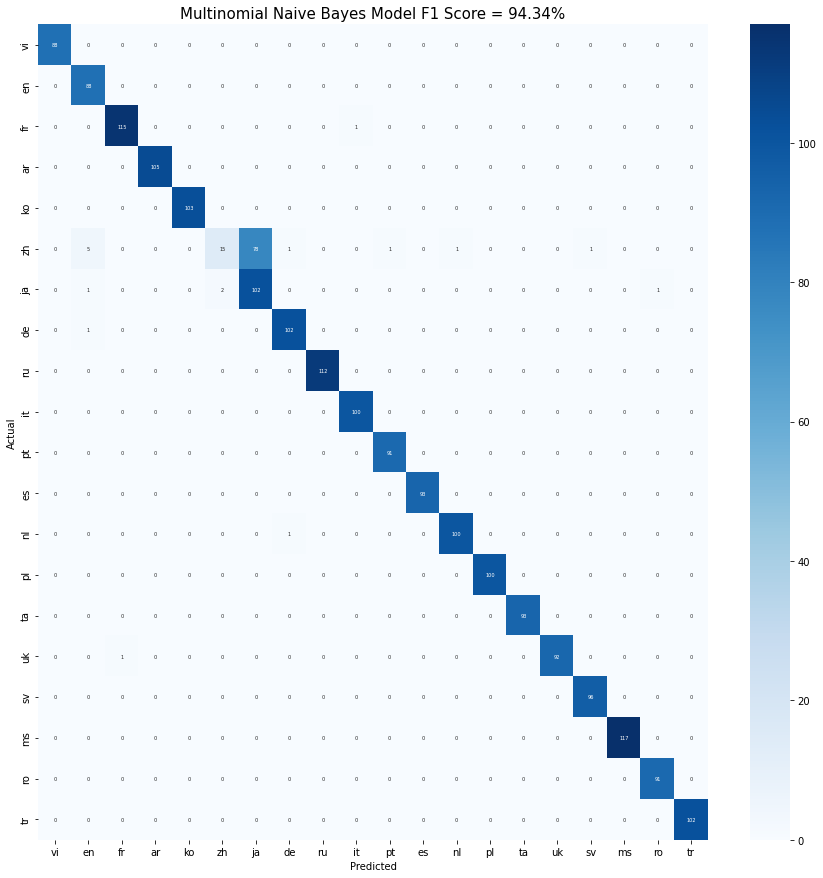

In [17]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

sns.heatmap(df_mulNB_cv, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Multinomial Naive Bayes Model F1 Score = {str(round(f1_score(y_test_cv, y_pred_mulNB_cv,average=average)*100,2))}%'
plt.title(title, size = 15)
plt.savefig('mul_nb_cv.png')
plt.show()


### Model 2: Support vector machine (SVM)

In [18]:
from sklearn.svm import SVC
svm = SVC()

In [19]:
svm.fit(x_train_cv, y_train_cv)
y_pred_svm_cv = svm.predict(x_test_cv)

In [20]:
cf_svm_cv = confusion_matrix(y_test_cv, y_pred_svm_cv, labels=labels)
df_svm_cv = pd.DataFrame(cf_svm_cv)

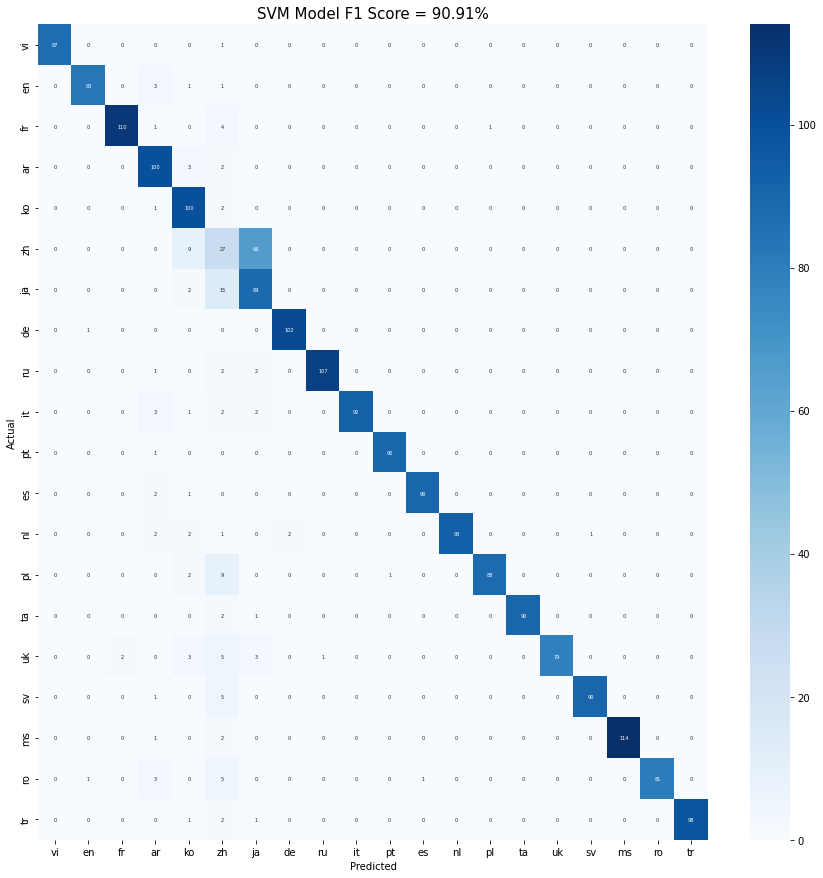

In [21]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

sns.heatmap(df_svm_cv, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'SVM Model F1 Score = {str(round(f1_score(y_test_cv, y_pred_svm_cv,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Model 3: Logictis Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_cv, y_train_cv)

LogisticRegression()

In [23]:
y_pred_lr_cv = lr.predict(x_test_cv)

In [24]:
cf_lr_cv = confusion_matrix(y_test_cv, y_pred_lr_cv, labels=labels)
df_lr_cv = pd.DataFrame(cf_lr_cv)

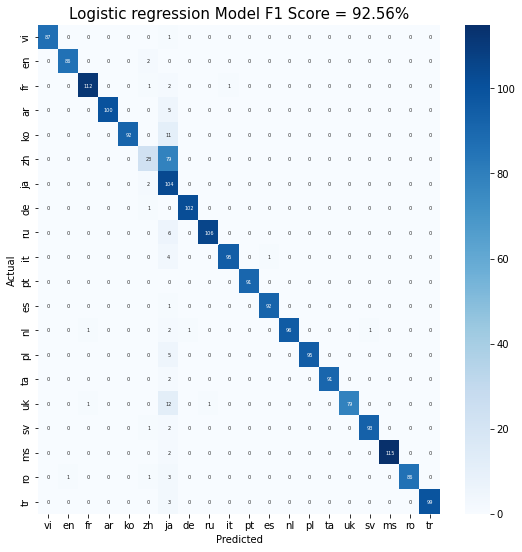

In [25]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_lr_cv, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Logistic regression Model F1 Score = {str(round(f1_score(y_test_cv, y_pred_lr_cv,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Model 4: Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
tr = DecisionTreeClassifier()
tr.fit(x_train_cv, y_train_cv)

DecisionTreeClassifier()

In [28]:
y_pred_tr_cv = tr.predict(x_test_cv)

In [29]:
cf_tr_cv = confusion_matrix(y_test_cv, y_pred_tr_cv, labels=labels)
df_tr_cv = pd.DataFrame(cf_tr_cv)

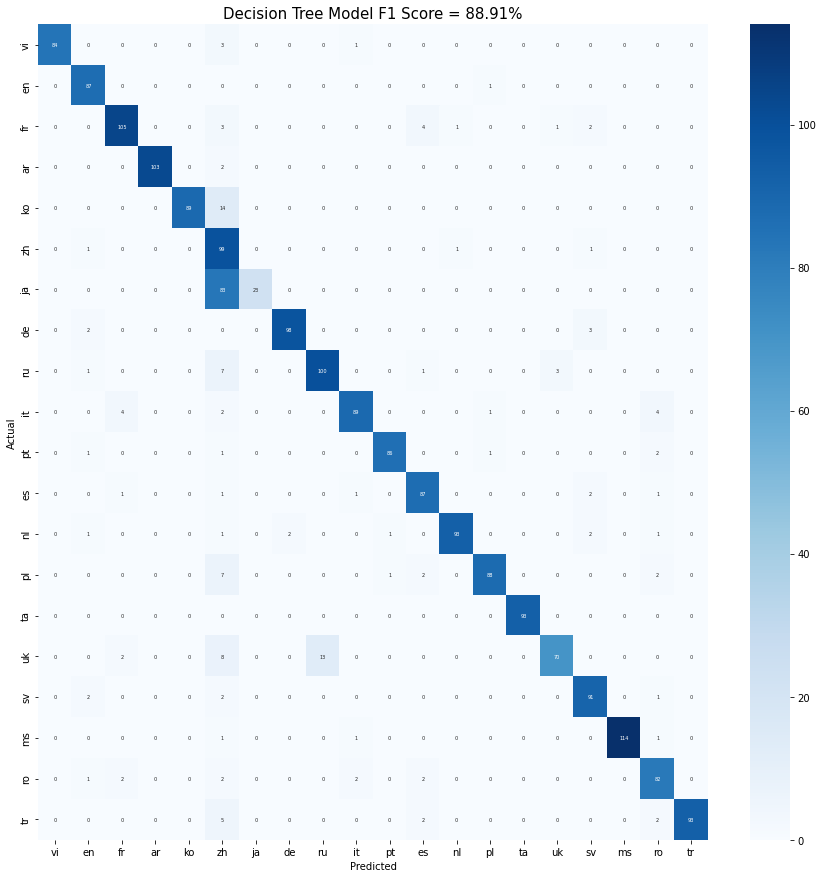

In [30]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

sns.heatmap(df_tr_cv, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Decision Tree Model F1 Score = {str(round(f1_score(y_test_cv, y_pred_tr_cv,average=average)*100,2))}%'
plt.title(title, size = 15)
plt.savefig('decision_tree_cv.png')
plt.show()

### Model 5: Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train_cv, y_train_cv)

RandomForestClassifier()

In [33]:
y_pred_rf_cv = rf.predict(x_test_cv)

In [34]:
cf_rf_cv = confusion_matrix(y_test_cv, y_pred_rf_cv, labels=labels)
df_rf_cv = pd.DataFrame(cf_rf_cv)

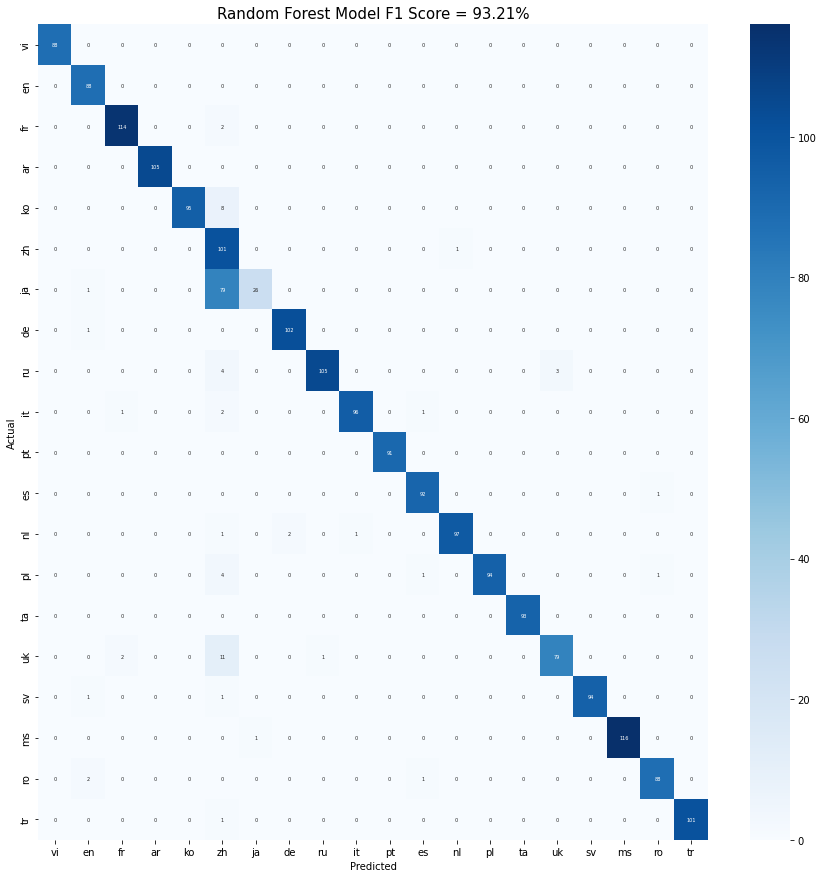

In [35]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

sns.heatmap(df_rf_cv, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Random Forest Model F1 Score = {str(round(f1_score(y_test_cv, y_pred_rf_cv,average=average)*100,2))}%'
plt.title(title, size = 15)
plt.savefig('rf_cv.png')

plt.show()

In [36]:
check = pd.DataFrame({'CV':x_test_cv, 'Text':cv.inverse_transform(x_test_cv),'True':y_test_cv, 'Predict':y_pred_mulNB_cv})
check.loc[:, ['CV', 'Text']]

,CV,Text
0,"(0, 1836)\t1\n (0, 3514)\t3\n (0, 8825)\t1...","[altas, as, centrais, do, encostas, esta, incl..."
1,"(0, 1721)\t1\n (0, 2251)\t1\n (0, 4488)\t1...","[alliés, anciens, avocats, bonaparte, conseil,..."
2,"(0, 34150)\t1\n (0, 37794)\t1\n (0, 58072)...","[mc, nfs, underground, автомобиль, более, боль..."
3,"(0, 385)\t1\n (0, 2256)\t1\n (0, 3204)\t1\...","[accurate, and, are, because, consist, ft, hei..."
4,"(0, 1013)\t1\n (0, 2618)\t1\n (0, 8396)\t1...","[afrykańska, antarktyczny, caricom, europejska..."
...,...,...
1995,"(0, 20011)\t1\n (0, 27741)\t1\n (0, 42601)...","[floyd是位有影响力的政治家, johnson, pillow和布什罗德约翰逊bushr..."
1996,"(0, 1124)\t1\n (0, 3514)\t1\n (0, 8826)\t1...","[agosto, as, central, comando, de, dissolvida,..."
1997,"(0, 2083)\t1\n (0, 8529)\t1\n (0, 24588)\t...","[ameryki, castellano, hiszpanii, hiszpańskojęz..."
1998,"(0, 1368)\t1\n (0, 2116)\t1\n (0, 3995)\t1...","[al, amministrativi, attuali, che, confini, co..."


### Check error

In [37]:
check_nb = pd.DataFrame({'Text':cv.inverse_transform(x_test_cv),'True':y_test_cv, 'Predict':y_pred_mulNB_cv})
error_nb = check_nb[check_nb['True'] != check_nb['Predict']]
error_nb.to_csv('e.csv')

In [38]:
check_svm = pd.DataFrame({'Text':cv.inverse_transform(x_test_cv),'True':y_test_cv, 'Predict':y_pred_svm_cv})
error_svm = check_svm[check_svm['True'] != check_svm['Predict']]
error_svm

,Text,True,Predict
4,"[afrykańska, antarktyczny, caricom, europejska...",polish,korean
15,"[主要在學習如何服從命令, 但也同時享有等級相對應的特權, 在嚴格的環境中履行職責, 新生並...",chinese,japanese
42,"[外国人の帰化等のその他増減を加味した人口動態でも年度人, 大田区戸籍住民課調べによる出生,...",japanese,chinese
44,"[betyder, där, finskan, högtid, in, juhla, lån...",swedish,chinese
46,"[bernalda, de, do, durána, dzieł, fernándeza, ...",polish,portuguese
...,...,...,...
1956,"[以及印第安納州的三個縣萊克, 凱恩, 創造該術語的, 威爾和坎卡基, 將該名稱定義包括芝加...",chinese,korean
1966,"[resolution, 同年月日通过克里斯坦琼森声明英语crittendenjohnson...",chinese,japanese
1986,"[davis, elizabeth, foxgenovese和lynn, hunt都认为, ...",chinese,korean
1989,"[この跡地に年に建設された丸の内ビルディングも旧ビルと共に, と呼ばれて, と評され, 丸ビ...",japanese,chinese


In [39]:
check_lr = pd.DataFrame({'Text':cv.inverse_transform(x_test_cv),'True':y_test_cv, 'Predict':y_pred_lr_cv})
error_lr = check_lr[check_lr['True'] != check_lr['Predict']]
error_lr

,Text,True,Predict
15,"[主要在學習如何服從命令, 但也同時享有等級相對應的特權, 在嚴格的環境中履行職責, 新生並...",chinese,japanese
44,"[betyder, där, finskan, högtid, in, juhla, lån...",swedish,chinese
47,"[التحرير, التي, المليون, الوطني, بـبلد, تلقب, ...",arabic,japanese
48,"[данія, країничлени, норвегія, фінляндія, швец...",ukrainian,japanese
70,"[但去世前撰写的回忆录截然不同, 在政治方面大加批判, 美墨战争时他的信件没有批判战争本身,...",chinese,japanese
...,...,...,...
1966,"[resolution, 同年月日通过克里斯坦琼森声明英语crittendenjohnson...",chinese,japanese
1979,"[並於三個月內發回立法會重議, 則必須辭職, 即握有限制否決權, 基本法, 如果立法會再以三...",chinese,japanese
1984,"[agiacsiò, anecdotique, corsica, de, della, ed...",french,italian
1986,"[davis, elizabeth, foxgenovese和lynn, hunt都认为, ...",chinese,japanese


## TfidfVectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
x_tf = tfid.fit_transform(x)

In [41]:
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(x_tf, y, test_size=0.1, random_state=42)

### Model 1: Multinomial Naive Bayes

In [42]:
mul_nb = MultinomialNB()
mul_nb.fit(x_train_tf, y_train_tf)

MultinomialNB()

In [43]:
y_pred_mulNB_tf = mul_nb.predict(x_test_tf)

In [44]:
cf_mulNB_tf = confusion_matrix(y_test_tf, y_pred_mulNB_tf, labels=labels)
df_mulNB_tf = pd.DataFrame(cf_mulNB_tf)

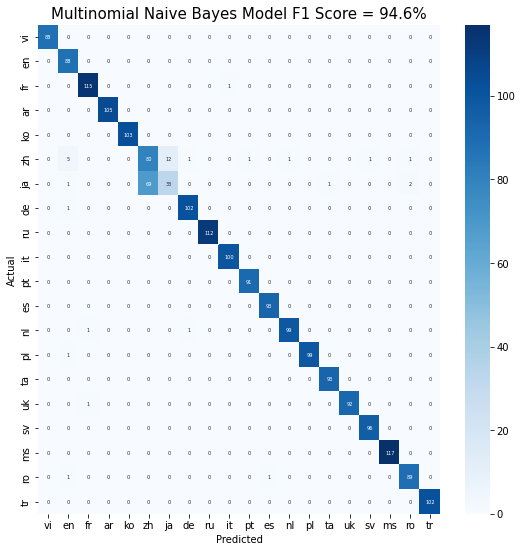

In [45]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_mulNB_tf, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Multinomial Naive Bayes Model F1 Score = {str(round(f1_score(y_test_tf, y_pred_mulNB_tf,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Model 2: Support Vector Machine (SVM)

In [46]:
svm = SVC()

In [47]:
svm.fit(x_train_tf, y_train_tf)
y_pred_svm_tf = svm.predict(x_test_tf)

In [48]:
cf_svm_tf = confusion_matrix(y_test_tf, y_pred_svm_tf, labels=labels)
df_svm_tf = pd.DataFrame(cf_svm_tf)

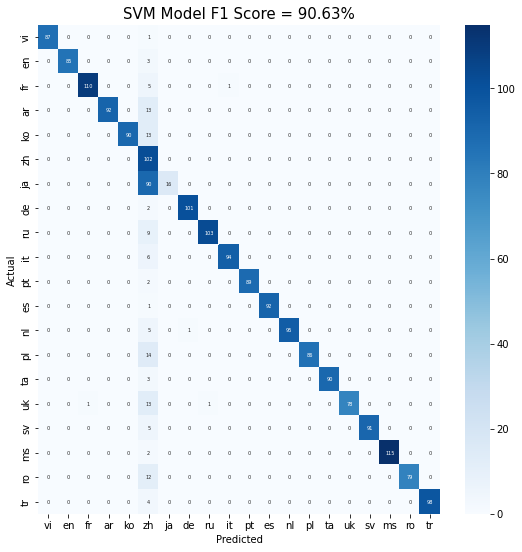

In [49]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_svm_tf, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'SVM Model F1 Score = {str(round(f1_score(y_test_tf, y_pred_svm_tf,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Model 3: Logistic Regression

In [50]:
lr = LogisticRegression()
lr.fit(x_train_tf, y_train_tf)

LogisticRegression()

In [51]:
y_pred_lr_tf = lr.predict(x_test_tf)

In [52]:
cf_lr_tf = confusion_matrix(y_test_tf, y_pred_lr_tf, labels=labels)
df_lr_tf = pd.DataFrame(cf_lr_tf)

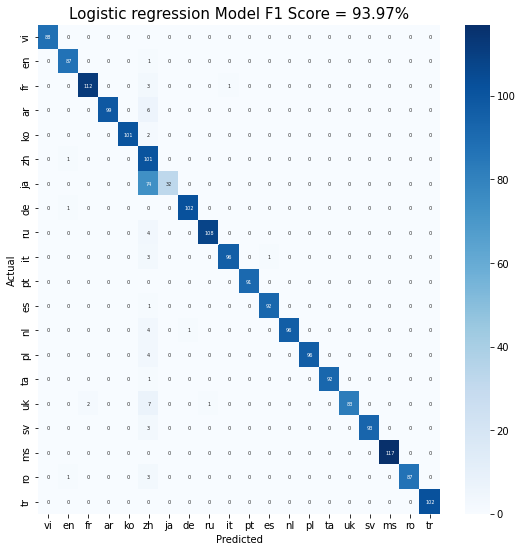

In [53]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_lr_tf, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Logistic regression Model F1 Score = {str(round(f1_score(y_test_tf, y_pred_lr_tf,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Model 4: Decision tree

In [54]:
tr = DecisionTreeClassifier()
tr.fit(x_train_tf, y_train_tf)

DecisionTreeClassifier()

In [55]:
y_pred_tr_tf = tr.predict(x_test_tf)

In [56]:
cf_tr_tf = confusion_matrix(y_test_tf, y_pred_tr_tf, labels=labels)
df_tr_tf = pd.DataFrame(cf_tr_tf)

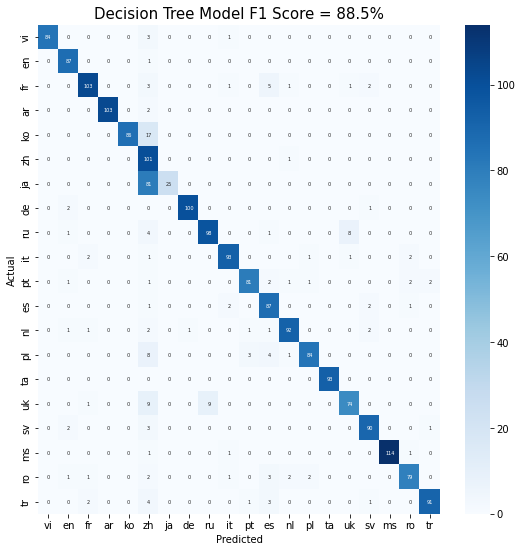

In [57]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_tr_tf, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Decision Tree Model F1 Score = {str(round(f1_score(y_test_tf, y_pred_tr_tf,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Model 5: Random Forest

In [58]:
rf = RandomForestClassifier()
rf.fit(x_train_tf, y_train_tf)

RandomForestClassifier()

In [59]:
y_pred_rf_tf = rf.predict(x_test_tf)

In [60]:
cf_rf_tf = confusion_matrix(y_test_tf, y_pred_rf_tf, labels=labels)
df_rf_tf = pd.DataFrame(cf_rf_tf)

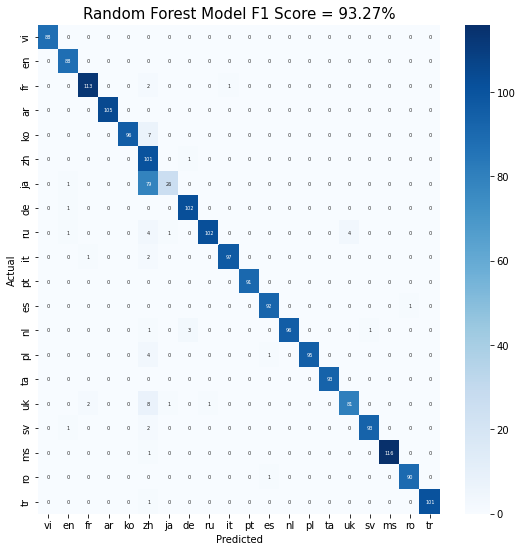

In [61]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_rf_tf, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Random Forest Model F1 Score = {str(round(f1_score(y_test_tf, y_pred_rf_tf,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Check error

In [62]:
check_nb = pd.DataFrame({'Text':tfid.inverse_transform(x_test_tf),'True':y_test_tf, 'Predict':y_pred_mulNB_tf})
error_nb = check_nb[check_nb['True'] != check_nb['Predict']]
error_nb

,Text,True,Predict
42,"[外国人の帰化等のその他増減を加味した人口動態でも年度人, 大田区戸籍住民課調べによる出生,...",japanese,chinese
72,"[これを受け, 廃仏毀釈が行われる事態となる, 日本の仏教に根付いていた寺請制度に不満を持っ...",japanese,chinese
86,"[年平成年に橋本龍太郎政権が実施した金融ビッグバン以降, 新産業として特に青年労働力を吸収す...",japanese,chinese
88,"[外交では年明治年月日, 大久保と木戸を全権副使とする大規模な使節団を欧米諸国に派遣した, ...",japanese,chinese
132,"[constitution提出許多觀點來說明其分離之動機, states, 美利堅聯盟國憲法...",chinese,english
...,...,...,...
1956,"[以及印第安納州的三個縣萊克, 凱恩, 創造該術語的, 威爾和坎卡基, 將該名稱定義包括芝加...",chinese,japanese
1979,"[並於三個月內發回立法會重議, 則必須辭職, 即握有限制否決權, 基本法, 如果立法會再以三...",chinese,japanese
1984,"[agiacsiò, anecdotique, corsica, de, della, ed...",french,italian
1986,"[davis, elizabeth, foxgenovese和lynn, hunt都认为, ...",chinese,german


In [63]:
check_svm = pd.DataFrame({'Text':tfid.inverse_transform(x_test_tf),'True':y_test_tf, 'Predict':y_pred_svm_tf})
error_svm = check_svm[check_svm['True'] != check_svm['Predict']]
error_svm

,Text,True,Predict
42,"[外国人の帰化等のその他増減を加味した人口動態でも年度人, 大田区戸籍住民課調べによる出生,...",japanese,chinese
44,"[betyder, där, finskan, högtid, in, juhla, lån...",swedish,chinese
47,"[التحرير, التي, المليون, الوطني, بـبلد, تلقب, ...",arabic,chinese
48,"[данія, країничлени, норвегія, фінляндія, швец...",ukrainian,chinese
72,"[これを受け, 廃仏毀釈が行われる事態となる, 日本の仏教に根付いていた寺請制度に不満を持っ...",japanese,chinese
...,...,...,...
1950,[大井競馬ではチケットぴあかつてはcnプレイガイドやイープラスで予約販売が行われていたを用い...,japanese,chinese
1962,"[が調印された, 安全保障協力に関する日豪共同宣言, 年月には, 日豪首脳会談において日豪間...",japanese,chinese
1984,"[agiacsiò, anecdotique, corsica, de, della, ed...",french,italian
1989,"[この跡地に年に建設された丸の内ビルディングも旧ビルと共に, と呼ばれて, と評され, 丸ビ...",japanese,chinese


In [64]:
check_lr = pd.DataFrame({'Text':tfid.inverse_transform(x_test_tf),'True':y_test_tf, 'Predict':y_pred_lr_tf})
error_lr = check_lr[check_lr['True'] != check_lr['Predict']]
error_lr

,Text,True,Predict
42,"[外国人の帰化等のその他増減を加味した人口動態でも年度人, 大田区戸籍住民課調べによる出生,...",japanese,chinese
44,"[betyder, där, finskan, högtid, in, juhla, lån...",swedish,chinese
47,"[التحرير, التي, المليون, الوطني, بـبلد, تلقب, ...",arabic,chinese
48,"[данія, країничлени, норвегія, фінляндія, швец...",ukrainian,chinese
72,"[これを受け, 廃仏毀釈が行われる事態となる, 日本の仏教に根付いていた寺請制度に不満を持っ...",japanese,chinese
...,...,...,...
1936,"[を切り開いた競馬場, 日本競馬の新しい時代である馬券黙許時代, 池上競馬場では日本人の手に...",japanese,chinese
1937,"[これまで施行されていた各内国産古馬競走を衣替えする形で目黒記念が創設された, また競馬場所...",japanese,chinese
1950,[大井競馬ではチケットぴあかつてはcnプレイガイドやイープラスで予約販売が行われていたを用い...,japanese,chinese
1984,"[agiacsiò, anecdotique, corsica, de, della, ed...",french,italian


# Trying Word2Vec

In [2]:
from gensim.models import Word2Vec
import nltk

ModuleNotFoundError: No module named 'gensim'

In [66]:
# Only once
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [67]:
%pip install fugashi[unidic-lite]
#!pip install jieba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 568 kB 5.2 MB/s 
     |████████████████████████████████| 47.4 MB 92 kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=14ba4d4e076975c07966312b51eb3ec9e6bb5e6e59656e2503dfbcde7dfd7ee1
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


In [68]:
import jieba
import fugashi

## Pre-processing data

In [69]:
x_jp = data[data['language']=='japanese']
x_zh = data[data['language']=='chinese']

In [70]:
x_zh['train'] = x_zh['text'].apply(jieba.lcut).apply(list)
x_zh

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.422 seconds.
Prefix dict has been built successfully.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,language,train
5000,西蒙玻利瓦尔巴克纳英語Simon Bolivar Buckner，年月日－年月日是美国军人、...,chinese,"[西蒙, 玻利瓦尔, 巴克纳, 英語, Simon, , Bolivar, , Buck..."
5001,内战爆发后，肯塔基州宣布保持中立，巴克纳对州民兵部队加以强化，试图保卫这种中立性，但很快就因...,chinese,"[内战, 爆发, 后, ，, 肯塔基州, 宣布, 保持中立, ，, 巴克纳, 对州, 民兵,..."
5002,巴克纳在内战接近尾声时还参加了布拉克斯顿布拉格领导的入侵肯塔基军事行动，这场行动以失败告终，...,chinese,"[巴克纳, 在, 内战, 接近, 尾声, 时, 还, 参加, 了, 布, 拉克斯, 顿, 布..."
5003,并且绰号诚实迪克的州财务官詹姆斯威廉塔特从州国库中盗取万美元潜逃这一丑闻也令他所领导的行政部...,chinese,"[并且, 绰号, 诚实, 迪克, 的, 州, 财务, 官, 詹姆斯, 威廉, 塔特, 从州,..."
5004,一年后，他加入了民主党中支持金本位、反对自由铸造银币的国家民主党派系，并且是该派系在大选中的...,chinese,"[一年, 后, ，, 他, 加入, 了, 民主党, 中, 支持, 金本位, 、, 反对, 自..."
...,...,...,...
5995,它對於倫理的檢視不是從預想的理論出發，而是調查實際道德主體moral agent所做出、並且...,chinese,"[它, 對, 於, 倫理, 的, 檢視, 不是, 從, 預想, 的, 理論, 出發, ，, ..."
5996,描述倫理學時常會對於幾種不同倫理系統做比較；區分這些不同倫理系統的參數可以是歷史時期、文化背...,chinese,"[描述, 倫理學, 時常會, 對, 於, 幾種, 不同, 倫理, 系統, 做, 比, 較, ..."
5997,描述倫理學又會將心理學、社會學、歷史學等等領域對於道德行為的學術研究結果融合併入，使得整體理...,chinese,"[描述, 倫理學, 又, 會將, 心理, 學, 、, 社會學, 、, 歷史學, 等等, 領域..."
5998,應用倫理學專注於解答的問題包括「墮胎是否不道德？」、「安樂死是否不道德？」、「平權措施是對還...,chinese,"[應用, 倫理學, 專注, 於, 解答, 的, 問題, 包括, 「, 墮胎, 是否, 不道德..."


In [71]:
type(x_zh.loc[5000, 'train'][2])

str

In [72]:
# Run this once only!
tagger = fugashi.Tagger()

In [73]:
train = []
for text in x_jp['text']:
  text = [word.surface for word in tagger(text)]
  train.append(text)
x_jp['train'] = train
x_jp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,language,train
6000,池上競馬場いけがみけいばじょう、Ikegami Racecourseは、年明治年から年明治年...,japanese,"[池上, 競馬, 場, いけ, が, み, け, い, ば, じょう, 、, Ikegami..."
6001,池上競馬場は、東京・池上に、明治時代末期の年明治年から年明治年までの年間だけ開設された、周マ...,japanese,"[池上, 競馬, 場, は, 、, 東京, ・, 池上, に, 、, 明治, 時代, 末期,..."
6002,池上競馬場では日本人の手によるはじめての馬券が発売され† 、日本競馬の新しい時代である馬券黙...,japanese,"[池上, 競馬, 場, で, は, 日本, 人, の, 手, に, よる, はじめて, の,..."
6003,東京競馬会は加納久宜と補佐役の安田伊左衛門が中心となって年に設立され、池上競馬場は政府と陸軍...,japanese,"[東京, 競馬, 会, は, 加納, 久, 宜, と, 補佐, 役, の, 安田, 伊左衛門..."
6004,政府は後続の競馬場の模範たるべく、また賭博の弊害を生まぬよう、さらに池上競馬場を上品な競馬場...,japanese,"[政府, は, 後続, の, 競馬, 場, の, 模範, たる, べく, 、, また, 賭博..."
...,...,...,...
6995,メルボルンではFやMotoGP、WSBが年回行われており、国内選手権なども盛んに行われ、数多...,japanese,"[メルボルン, で, は, F, や, MotoGP, 、, WSB, が, 年, 回, 行..."
6996,有名どころでは、WGPで王者となり日本のGTレースにも参戦したワイン・ガードナー、F黎明期の...,japanese,"[有名, どころ, で, は, 、, WGP, で, 王者, と, なり, 日本, の, G..."
6997,また、ラリー競技も盛んであり、隔年で世界ラリー選手権が開催されているほか、オーストラリアラリ...,japanese,"[また, 、, ラリー, 競技, も, 盛ん, で, あり, 、, 隔年, で, 世界, ラ..."
6998,その中でもイアン・ソープは世界的に有名であり、年のシドニー五輪において個の金メダルを獲得した,japanese,"[その, 中, で, も, イアン, ・, ソープ, は, 世界, 的, に, 有名, で,..."


In [74]:
type(x_jp.loc[6000, 'train'][2])

str

In [75]:
y_jp = ['japanese']*1000
y_zh = ['chinese']*1000

## Train_test_split data

#### Split Zh, Ja data

In [76]:
x_jp_train, x_jp_test, y_jp_train, y_jp_test = train_test_split(x_jp['train'], y_jp, test_size=0.1, random_state=42)
x_zh_train, x_zh_test, y_zh_train, y_zh_test = train_test_split(x_zh['train'], y_zh, test_size=0.1, random_state=42)

In [77]:
jp_train = pd.DataFrame({'train':x_jp_train, 'language':['japanese']*len(x_jp_train)})
zh_train = pd.DataFrame({'train':x_zh_train, 'language':['chinese']*len(x_jp_train)})
new_train = pd.concat([jp_train, zh_train])

In [78]:
jp_test = pd.DataFrame({'test':x_jp_test, 'language':['japanese']*len(x_jp_test)})
zh_test = pd.DataFrame({'test':x_zh_test, 'language':['chinese']*len(x_jp_test)})
new_test = pd.concat([jp_test, zh_test])

#### Split other data

In [79]:
condition = (data['language'] != 'chinese') & (data['language'] != 'japanese')
x_wv = data[condition]['text']
y_wv = data[condition]['language']

In [80]:
x_w2v_train, x_w2v_test, y_train_w2v, y_w2v_test = train_test_split(x_wv, y_wv, test_size=0.1, random_state=42)

In [81]:
train_data = pd.DataFrame({'text':x_w2v_train, 'language':y_train_w2v})
test_data = pd.DataFrame({'text':x_w2v_test, 'language':y_w2v_test})

In [82]:
train_data['train'] = [nltk.word_tokenize(new) for new in train_data.text]
test_data['test'] = [nltk.word_tokenize(new) for new in test_data.text]

#### Combine all

In [83]:
final_train = pd.concat([train_data.drop(['text'], axis=1), new_train]).reset_index().drop('index', axis=1)
final_test = pd.concat([test_data.drop(['text'], axis=1), new_test]).reset_index().drop('index', axis=1)

In [84]:
final_train

,language,train
0,turkish,"[Kamûsı, Türkîde, yazılışı, صڭسون, yani, sansu..."
1,spanish,"[Los, historiadores, suelen, referirse, a, est..."
2,swedish,"[Landgericht, är, en, tysk, domstol, som, finn..."
3,korean,"[현재, 전국, 단위, 지상파, 방송으로, 국공영, 방송인, 한국방송공사KBS와, ..."
4,swedish,"[Med, en, för, stor, betoning, på, det, histor..."
...,...,...
17995,chinese,"[開戰前, 由, 於, 南北, 雙方, 奉行, 的, 政策, 不同, ，, 加上, 第二次,..."
17996,chinese,"[年代, 禁酒令, 时期, ，, 芝加哥, 黑社会, 势力, 横行, ，, 产生, 芝加哥,..."
17997,chinese,"[南美洲, 大多, 數國家, 的, 官方, 語言為, 西班牙, 語, ，, 其他, 如, 巴..."
17998,chinese,"[国会, 拒绝, 加强, 反, 暴力, 法, ，, 只, 通过, 一刀切, 的, 新法, 确..."


## Building Word2vec model

In [85]:
model = Word2Vec((final_train.loc[:,'train']), min_count=1)

In [86]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in model.wv.vocab]
    return np.mean(model.wv[doc], axis=0)

In [87]:
for i,text in enumerate(final_train['train']):
  try:
    document_vector(text)
  except Exception:
    print(i)

In [88]:
for i,text in enumerate(final_test['test']):
  try:
    document_vector(text)
  except Exception:
    print(i)

In [89]:
doc_train = final_train['train'].apply(document_vector)
doc_test = final_test['test'].apply(document_vector)

In [90]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(final_train['language'])

LabelEncoder()

In [91]:
x_train_wv = list(doc_train)
y_train_wv = lb.transform(final_train['language'])

In [92]:
x_test_wv = list(doc_test)
y_test_wv = lb.transform(final_test['language'])

### Model 1: Support Vector Machine

In [93]:
svm = SVC()
svm.fit(x_train_wv, y_train_wv)

SVC()

In [94]:
y_pred_svm_wv = svm.predict(x_test_wv)

In [97]:
lb.inverse_transform(y_test_wv)

array(['french', 'italian', 'spanish', ..., 'chinese', 'chinese',
       'chinese'], dtype=object)

In [98]:
cf_svm_wv = confusion_matrix(y_test_wv, y_pred_svm_wv, labels=lb.transform(labels))
df_svm_wv = pd.DataFrame(cf_svm_wv)

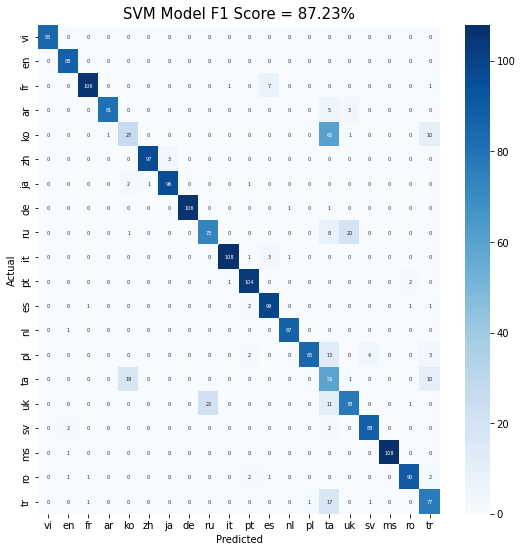

In [100]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_svm_wv, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'SVM Model F1 Score = {str(round(f1_score(y_test_wv, y_pred_svm_wv,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Model 2: Logistic regression

In [101]:
lr = LogisticRegression()
lr.fit(x_train_wv, y_train_wv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [102]:
y_pred_lr_wv = lr.predict(x_test_wv)

In [103]:
cf_lr_wv = confusion_matrix(y_test_wv, y_pred_lr_wv, labels=lb.transform(labels))
df_lr_wv = pd.DataFrame(cf_lr_wv)

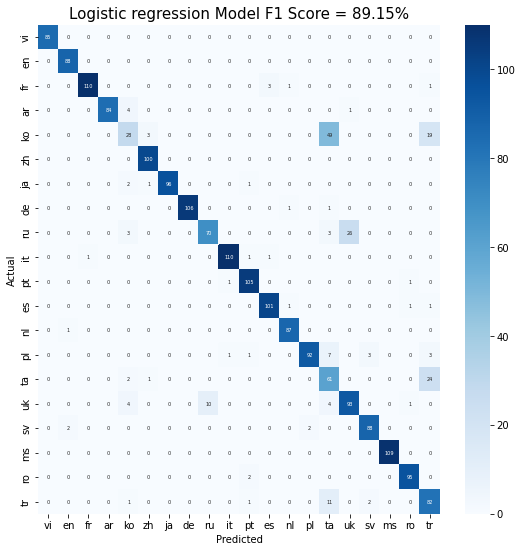

In [104]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_lr_wv, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Logistic regression Model F1 Score = {str(round(f1_score(y_test_wv, y_pred_lr_wv,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Model 3: Decision tree

In [105]:
tr = DecisionTreeClassifier()
tr.fit(x_train_wv, y_train_wv)

DecisionTreeClassifier()

In [106]:
y_pred_tr_wv = tr.predict(x_test_wv)

In [107]:
cf_tr_wv = confusion_matrix(y_test_wv, y_pred_tr_wv, labels=lb.transform(labels))
df_tr_wv = pd.DataFrame(cf_tr_wv)

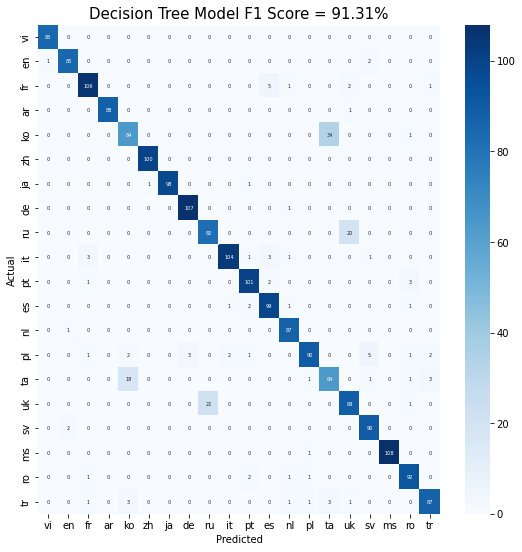

In [108]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_tr_wv, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Decision Tree Model F1 Score = {str(round(f1_score(y_test_wv, y_pred_tr_wv,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

### Model 4: Random Forest

In [109]:
rf = RandomForestClassifier()
rf.fit(x_train_wv, y_train_wv)

RandomForestClassifier()

In [110]:
y_pred_rf_wv = rf.predict(x_test_wv)

In [111]:
cf_rf_wv = confusion_matrix(y_test_wv, y_pred_rf_wv, labels=lb.transform(labels))
df_rf_wv = pd.DataFrame(cf_rf_wv)

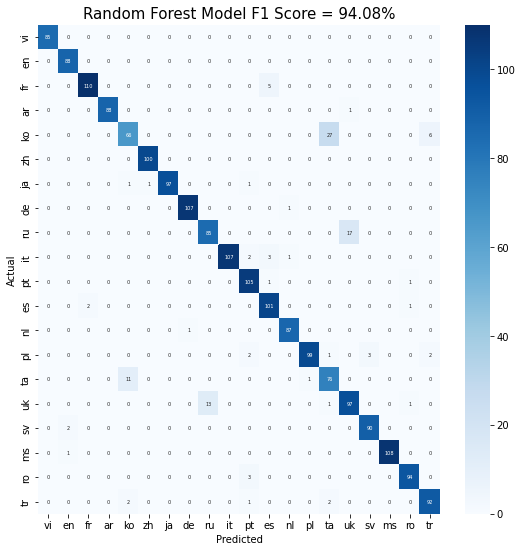

In [112]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

sns.heatmap(df_rf_wv, annot=True, annot_kws={'size':5}, cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(language_sym)
ax.set_yticklabels(language_sym)
title = f'Random Forest Model F1 Score = {str(round(f1_score(y_test_wv, y_pred_rf_wv,average=average)*100,2))}%'
plt.title(title, size = 15)

plt.show()

In [113]:
check_wv = pd.DataFrame({'text':final_test['test'], 'W2v':x_test_wv})
check_wv

,text,W2v
0,"[Napoléon, arrête, le, mouvement, révolutionna...","[0.9503272, -1.345346, 0.5821669, 0.8593477, 0..."
1,"[Il, servizio, di, trasporto, pubblico, urbano...","[0.9152099, -0.97555584, 0.27287707, 0.4670711..."
2,"[Un, buen, recuerdo, de, Aulo, Vitelio, fue, c...","[1.2043114, -1.9819537, 0.96207666, 0.9758384,..."
3,"[In, den, frühen, erJahren, etablierten, sich,...","[0.44851997, -0.8032497, 0.56072986, 0.0043954..."
4,"[Nhà, vua, Bảo, Đại, chẳng, có, vai, trò, gì, ...","[0.57271856, -0.50602615, 0.08016538, -0.38437..."
...,...,...
1995,"[继任, 共和党, 总统, 拉瑟福德, 伯查德, 海斯, 力图, 安抚, 南方, ，, 只要...","[0.7160467, -0.5901585, 0.26610222, 0.06033223..."
1996,"[代表, 们, 先前, 已经, 考虑, 过, 有关, 参议员, 议长, 的, 遴选, ，, ...","[0.7617591, -0.60871816, 0.2796977, 0.08946023..."
1997,"[他承諾, 盡, 其, 所能, 反對, 奴隸, 制度, 在, 新, 領土, 的, 擴張, 及...","[0.70044416, -0.5704434, 0.26076978, 0.0906681..."
1998,"[巴克纳, 通过, 行使, 否决权, 明确, 表明, 了, 自己, 对, 特殊, 利益, 法...","[0.9109217, -0.73732454, 0.33959174, 0.1141852..."


# Compare: CountVectorizer, TfidfVectorizer và Word2Vec

## F1 score

In [114]:
f1_cv_list = [f1_score(y_test_cv, y_pred_mulNB_cv, average=average), f1_score(y_test_cv, y_pred_svm_cv, average=average), 
           f1_score(y_test_cv, y_pred_lr_cv, average=average), f1_score(y_test_cv, y_pred_tr_cv, average=average),
           f1_score(y_test_cv, y_pred_rf_cv, average=average)]

f1_tifd_list = [f1_score(y_test_tf, y_pred_mulNB_tf, average=average), f1_score(y_test_tf, y_pred_svm_tf, average=average), 
             f1_score(y_test_tf, y_pred_lr_tf, average=average), f1_score(y_test_cv, y_pred_tr_tf, average=average),
             f1_score(y_test_cv, y_pred_rf_tf, average=average)]

f1_wv_list = [np.nan, f1_score(y_test_wv, y_pred_svm_wv, average=average), 
           f1_score(y_test_wv, y_pred_lr_wv, average=average), f1_score(y_test_wv, y_pred_tr_wv, average=average),
           f1_score(y_test_wv, y_pred_rf_wv, average=average)]

In [115]:
compare_f1 = pd.DataFrame({'CountVectorizer': f1_cv_list, 'TfidfVectorizer': f1_tifd_list, 'Word2Vec': f1_wv_list}, 
                       index=['Multinomial NB', 'SVM', 'Logistic regression', 'Decision tree', 'Random forest'])
compare_f1

,CountVectorizer,TfidfVectorizer,Word2Vec
Multinomial NB,0.943382,0.945976,NaN
SVM,0.909062,0.906350,0.872264
Logistic regression,0.925562,0.939720,0.891478
Decision tree,0.889053,0.885011,0.913124
Random forest,0.932116,0.932731,0.940837


## Accuracy

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
ac_cv_list = [accuracy_score(y_test_cv, y_pred_mulNB_cv), accuracy_score(y_test_cv, y_pred_svm_cv), 
           accuracy_score(y_test_cv, y_pred_lr_cv), accuracy_score(y_test_cv, y_pred_tr_cv),
           accuracy_score(y_test_cv, y_pred_rf_cv)]

ac_tifd_list = [accuracy_score(y_test_tf, y_pred_mulNB_tf), accuracy_score(y_test_tf, y_pred_svm_tf), 
             accuracy_score(y_test_tf, y_pred_lr_tf), accuracy_score(y_test_cv, y_pred_tr_tf),
             accuracy_score(y_test_cv, y_pred_rf_tf)]

ac_wv_list = [np.nan, accuracy_score(y_test_wv, y_pred_svm_wv), 
           accuracy_score(y_test_wv, y_pred_lr_wv), accuracy_score(y_test_wv, y_pred_tr_wv),
           accuracy_score(y_test_wv, y_pred_rf_wv)]

In [119]:
compare_ac = pd.DataFrame({'CountVectorizer': ac_cv_list, 'TfidfVectorizer': ac_tifd_list, 'Word2Vec': ac_wv_list}, 
                       index=['Multinomial NB', 'SVM', 'Logistic regression', 'Decision tree', 'Random forest'])
compare_ac

,CountVectorizer,TfidfVectorizer,Word2Vec
Multinomial NB,0.9525,0.9485,NaN
SVM,0.9050,0.8965,0.871
Logistic regression,0.9220,0.9375,0.895
Decision tree,0.8870,0.8825,0.913
Random forest,0.9325,0.9330,0.941
